# 1. Motivation
## 1.1 Dataset
The main dataset was the NYC Street Tree Data from 2015 and is the result of a community survery done mainly by volunteers, cataloging all trees in NYC. As secondary data sets we had the ones regarding Street Tree Data from 1995 and 2005. Moreover, we used the air pollution data in New York City, in order to understand the influence of trees on the air quality. We also started analyzing the "311" dataset, to explore some complaints regarding trees.
The Street Tree dataset was chosen because it could give new insights and perspective to urban planning, discover their status (how healthy they are, if people are taking care of those etc.), and if they are influencing the life quality of the city. Moreover we could have discovered facts that most people would probably not be aware of beforehand.  


## 1.2 Goal
The goal was to enlighten users about trees in NYC. Are there certain types of trees more suitable for streets than others? Where are they located? Is it possible to know which kind of tree you might encounter based on the location, health of the tree, the diameter, or even the amount of problems of the tree? From this project it should be possible to learn something new about a topic you might never have considered learning something about.

# 2. Basic stats
## 2.1 Preprocessing the data
### 2.1.1 Variable selection
When taking a first glance at the dataset it was a bit overwhelming, as it's huge and there are a lot of rows which does not necessarily make sense at a first glance, as wel as a number of of variables not particularly interesting or necessary for what we wanted to do. Each variable was carefully examined and the variables deemed unnecessary were excluded. Among these was "Tree_Id", a unique ID for each tree, but this unique ID was unique for each of the three datasets (1995, 2005, 2015), meaning it was not possible to join the datasets by this ID, deeming it not relevant. Other excluded variables were address information, since there were multiple variables delivering address information on different levels - and it was not relevant to distinguish between all these. 

### 2.1.2 Observation selection
It was decided to only focus on the top 20 tree species, since there were a lot of different species without a significant amount of observations, it would be difficult to describe them all properly. It would also be very difficult to do good predictions if the observations are sparse. 

There were a lot of trees without a species listed, and those were disregarded completely. The dead trees were also excluded from the dataset. 

It was considered to only focus on one of the five boroughs in NYC to get a more detailed view. This was not implemented since it was deemed more interesting to two differences between the boroughs as well. 


## 2.2 Stats for the preprocessed data
The final dataset "Street Tree Data 2015" consists of 534,514 tree observations and 21 variables/features, totalling 74.5 MB.
The selected features were: 
* Diameter (inches)
* Health (three values: Good, fair, poor)
* Spc_Latin, Spc_Common (latin and common name for the species) 
* Sidewalk_Condition (two values: Damage, NoDamage)
* Problems (a string concatenated from the following types of problems)
 * root_stone, root_grate, root_other, trunk_wire, trnk_light, trnk_other, brch_light, brch_shoe, brch_other (two values: yes/no)
* Address
* Zipcode
* CB (community board)
* Borough
* Latitude, Longitude

Amount of trees in each borough:
- Bronx: 63,035
- Brooklyn: 138,760
- Staten Island: 82,619
- Manhattan: 54,115
- Queens: 195,985

In general, the top 20 species were the same for the 5 boroughs, but the order of this "top 20" list was different. There were more trees with general problems in Manhattan as well as more unhealthy trees. 

But let's start looking at the main dataset, the 2015 Street Tree Census (https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh).


In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

tree_data15 = pd.read_csv('2015_tree_data_updated.csv')

IOError: File 2015_tree_data_updated.csv does not exist


### 2.2.1 More observations in the data 
### <font color='red'> DANIELE: WRITE SOMETHING ABOUT WHAT YOU FOUND</font>

## 2.3 Other datasets inspected
Multiple secondary datasets were inspected, e.g. the 311 dataset and the airpollution dataset, as well as the Street Tree datasets from 2005 and 1995, respectively. In the 311 set, there were several complaints about trees in NYC. No significant correlations were found though. It was hoped that a connected between a certain type of complaint were correlated with different problems or the health of the tree, but unfortunately data does not always behave as hoped or suspected, and patterns cannot (and should not) be forced to appear. 

One could also be inclined to wonder if more "green" areas, meaning areas with a lot of trees, had higher house prices. Again, after investigation, this was found to be challenging, since there is not a lot of information about house prices available - at least not on a neighbourhood level. 

It was also considered if there was a correlation between the trees/features of the trees and the air pollution. This dataset was used for simple linear regression. 


# 3. Theory

## 3.1 Machine Learning tools
When doing predictions it can be difficult to find the appropriate tools to use. Different tools have different qualities and it all depends on the data and the patterns in your data. In this project, different tools have been tried out, typically multiple tools for the same prediction to inspect the model performance of each tool. 

### 3.1.1 KNN
KNN is a tool rather easy to grasp and implement. It was chosen for predicting the health of a tree based on GPS coordinates, as well as predicting species based on GPS coordinates. An argument for KNN being the most appropriate choice is that one could think that when planting trees, one would be inclined to plant the same trees together. One could also think that unhealthy trees are likely in the same area, presumable because of a decease in the area, a pollution problem, soil problems or something completely different. A drawback of the KNN method is that when dealing when an unbalanced dataset it will favour the most occuring observation. 

### 3.1.2 Decision trees
Decision trees can often be a good choice because they are nice to visualize. A drawback is that they tend to overfit the training data. It was used for predicting health based on GPS coordinates, as well as species based on GPS coordinates in spite of its drawback. When predicting species different features were added to see if they contributed to the predictions, e.g. the diameter. The main reason was to compare with the other results. If the decision trees did not overfit and still performed well, then it would be nice to visualize. To accomodate the overfitting issue a random forest was also tried out.

Decision trees were also used to predict diameter based on species and problems, as well as predicting diamater based on the amount of problems. Here, the diameter was binned in bins of different sizes (1-10, 10-15, 15-20, ..., 45-50, 50-60, 60-70, ..., 90-100, 100-150, 150-200, ...)

### 3.1.3 SVM
As a third tool, Support Vector Machines were tried out. SVMs can do linear classification by creating a "maximum seperating hyperplane" between data. It can also do non-linear classification using a so-called kernel-trick where inputs are mapped to high-dimensional feature space. This was used to predict health based on GPS coordinates. 

### 3.1.4 Apriori
Apriori is an algorithm for frequent item search. It was used to inspect problems appearing together.
<font color='red'> DANIELE: ADD MORE?</font>

### 3.1.5 Linear regression
Linear regression was used to inspect correlation between different features, and is not really a machine learning tool as much as a tool for investigating linear correlations. It was used to predict air pollution based on the amount of trees as well as diameter. 

## 3.2 Model selection
When selecting appropriate models, first thing is to split the data into a training set and a test set. 
When predicting health (or species) based on GPS coordinates, a test set consisting of 15% of the total amount of observations was used. Hereafter the training set was "split" into a training set and a validation set, using a 5-fold cross-validation. The best model was chosen based on accuracy scored, but with computation time taken into account as well. For the KNN, different values of $k$ was tried, ranging from $K=2,...,10$. The limit was set to 10 because it was not expected that we would have a whole area of unhealthy trees, and that might just confuse the predictions. 

### <font color='red'> DANIELE: MISSING INFO - WHAT DID YOU Do?</font>

## 3.3 Model performance
For predicting species and health based on GPS coordinates, KNN was selected as the best model. SVM simply took a significant amount of time to run, making it difficult to fine tune and handle. Decision trees overfitted the training data and was not good at handling sparse data.

For predicting species, the KNN classifier was able to predict $51.7$% accurately for $K=4$ on the test data, whereas the average (average over the 5 folds) performance on the validation set were $49.9$% (compared to $49$% for decision trees). This is considered rather good, taken into account that it is labelling $20$ different species, but it would also suggest that the same species is not always planted next to each other. They are actually not planted next to each other more often than expected before investigating the data. 
    In comparison, when only trying to predict the top 5 species instead of all 20 species, the average performance on the validation set were $70.4$% for $K=4$. This also confirms that the same species are not always planted next to each other, and shows, as expected, that the model performs better when addressing fewer species. 

For predicting health, the KNN classifier was able to predict $80.7$% accurately for $K=5$ on the test data, whereas the average (over the 5 folds) performance on the valdiation set were $80.4$% (compared to $74.8$% for decision trees). An accuracy of $80.7$% is rather good considering the sparsity of the "fair" and "poor" tree observations. The KNN did handle the sparsity trees better than the decision tree classifier. When it labeled a tree as "fair" it had around $43$% correct (on the validation set for $K=5$). A bit worse it went for the "poor" classifications, here it only predicted around $1/3$ correctly. It was, as we thought, much better at predicting the good trees. This makes sense since there were a lot more training data available. In comparison, the decision tree classifier had around $31$% correct for the "fair" trees, and $17$% for the "poor" trees. The amount of misclassifications on the "poor" and "fair" trees suggests that the condition of the trees do not really reflect on its neighbours and are most likely caused by other, individual things. 

### <font color='red'>DANIELE: WRITE SOMETHING ABOUT YOUR MODELS PERFORMANCE</font>

# 4. Visualizations

## 4.1 Borough-basics
The d3 pie charts show the basic distributions of the data: Amount of trees in each borough and the size of each borough. They were chosen so the user was able to get a clear view of the differences between the boroughs. As comparison, the other pie chart shows the size each borough. Here, it is obvious that the amount of trees in each borough roughly corresponds to the size of the borough, and the exact percentage can be viewed when hovering over each borough. 

These charts are important for the project since they introduce the user to the topic: What are the different boroughs, how are they different with regards to size and amount of trees? 

## 4.2 Tree distribution of top 5 species
The d3 bar chart show the distribution of the 5 most common species in NYC for each borough, as well as NYC. This illustrates the borough-wise differences regarding the most common trees. E.g. the London Planetree is the most common tree in NYC. It is also the most common tree in Queens. Queens is the largest area in NYC both regarding trees and size, as shown in the pie charts. Therefore it might be that most of NYC's London Planetrees are located in Queens, but as it can be seen from the chart, most of them actually comes from Brooklyn. The chart also have the option of changing the years from 2015 to either 2005 or 1995, and hereby see the differences over time as well. 

This chart is important for the project since it enables the user to view the distribution of the most common trees in NYC on borough level for the three different years available: 1995, 2005, 2015. This helps us show the changes in street trees in NYC over time.

## 4.3 Fun facts about the top 10 species
This page enables the user to hover over pictures of leaves for the 10 most common species to see the species name, and then when clicking a leaf image, fun facts about these trees appear. 

This function is important for the project since it sets each of the trees in a context: What is it called? What is its ranking? How many trees are there of this species? What is special/interesting about the species? Why is it a good street tree compared to others? 

## 4.4 Health of the NYC street trees
The d3 geoplot enables the user to view a prediction of the health of the NYC street trees, using KNN as a classifier. It is possible to hover for details, and to switch between visualizing the good, fair, and poor trees. 
### <font color='red'> THOMAS: MORE? add something about your plot</font>

The geoplot is important for the project since it shows the location of the trees with different health. Because of the large amount of data points it would have created a too confusing picture to visualize all three health states at the same time. 

## 4.5 Scatterplot
### <font color='red'> DANIELE: MISSING PLOT - write something about your plot</font>

# 5. Discussion
When working with the project, two things became clear to us: 
1) Real life data is messy
2) Data do not care what you think of them

It is possible to have good intentions, and a lot of good ideas as to what to do when analyzing a dataset, but the data itself just have limitations that are not always possible to overcome. 

## 5.1 What went well?
During the project, a lot of things did not go as expected. First of all, the pattern we expected to find in the data was just not there. The intention was to find correlation between the problems of the trees and the health, possible also correlation with the diameter. A lot of basic Pearson correlations was done on the data, but it appeared that there actually were no significant correlations. Then a lot of other datasets were inspected to see if they were correlated with some of the tree data features. Not a lot of great things appeared, so we tried keeping to the basics and that went quite well.

We managed to create a lot of plots and visualizations of the data, showing the fundamentals counts. We also managed to apply different machine learning methods, though they only showed us what the preliminary analysis did: In general, there were not really large areas with problematic trees, and that could not really be related to the health. The health was sparse, influencing the predictions. 

## 5.2 Possible improvements
If there was more data available to join with the street tree data, we might have been able to find a nice pattern/correlation, but in spite of our efforts to do so, we did not manage to find such data set. 

We could also have focused on one prediction goal instead of trying to find a lot of different patterns, that turned out to not be there. E.g. we could have focused on predicting species based but with some other tools, since KNN obviously was not the best choice. A suggestion would be to try do some binary classifications, locating e.g. London Planetrees using SVMs.

## 5.3 What is still missing?
In the end, what we actually missed was patterns in the data so we could have done some more advanced and great predictions. But patterns cannot be forced, so with that in mind, we could have used more visualizations for the predictions we did. We kept the website basic to try to create some beautiful visualizations of the basic stats instead of trying to visualize predictions in different ways. This choice was made based on the lack of good patterns. We did not really want to show a lot of predictions if they were not actually useful. 

# Appendix: Code

## Loading data

In [2]:
#Import data
import pandas as pd
import csv

tree_data = pd.read_csv('2015_tree_data_updated.csv')

In [4]:
#Convert health categories to numbers. 1: Poor, 2: Fair, 3: Good. Higher = Better
health = []
for i in range(len(tree_data['Health'])):
    if tree_data['Health'][i] == 'Good':
        health.append(3)
    elif tree_data['Health'][i] == 'Fair':
        health.append(2)
    elif tree_data['Health'][i] == 'Poor':
        health.append(1)
    else:
        health.append(0)
        #print "err", tree_data['Health'][i], i

## Data analysis

In [5]:
#Count no. of trees in each borough:
boros = tree_data['Borough'].unique()
print tree_data['Borough'].value_counts()

Queens           195985
Brooklyn         138760
Staten Island     82619
Bronx             63035
Manhattan         54115
Name: Borough, dtype: int64


### Data for histogram

In [6]:
#2015 data 

import numpy as np

#NYC top 20 species
unique, counts = np.unique(zip(tree_data['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Extract data for each borough
tree_data_bronx = tree_data.loc[tree_data['Borough'] == 'Bronx']
tree_data_brook = tree_data.loc[tree_data['Borough'] == 'Brooklyn']
tree_data_stat = tree_data.loc[tree_data['Borough'] == 'Staten Island']
tree_data_manh = tree_data.loc[tree_data['Borough'] == 'Manhattan']
tree_data_queens = tree_data.loc[tree_data['Borough'] == 'Queens']

#Bronx
unique, counts = np.unique(zip(tree_data_bronx['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Brooklyn
unique, counts = np.unique(zip(tree_data_brook['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Staten Island
unique, counts = np.unique(zip(tree_data_stat['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Manhattan
unique, counts = np.unique(zip(tree_data_manh['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Queens
unique, counts = np.unique(zip(tree_data_queens['Spc_Common']), return_counts=True)
print "Queens data:"
print sorted(zip(counts, unique), reverse = True)

Queens data:
[(31111, 'London planetree'), (22610, 'pin oak'), (20290, 'honeylocust'), (19407, 'Norway maple'), (16547, 'Callery pear'), (13497, 'cherry'), (11902, 'littleleaf linden'), (8987, 'Japanese zelkova'), (7389, 'green ash'), (6116, 'silver maple'), (5971, 'ginkgo'), (5386, 'Sophora'), (4935, 'red maple'), (4769, 'American linden'), (4146, 'silver linden'), (3035, 'purple-leaf plum'), (2992, 'maple'), (2697, 'northern red oak'), (2489, 'sweetgum'), (1709, 'American elm')]


In [7]:
#2005 data
import pandas as pd
import numpy as np

tree_data = pd.read_csv('2005_tree_data_updated.csv')

#NYC top 20 species
unique, counts = np.unique(zip(tree_data['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Extract data for each borough
tree_data_bronx = tree_data.loc[tree_data['Borough'] == 'Bronx']
tree_data_brook = tree_data.loc[tree_data['Borough'] == 'Brooklyn']
tree_data_stat = tree_data.loc[tree_data['Borough'] == 5]
tree_data_manh = tree_data.loc[tree_data['Borough'] == 'Manhattan']
tree_data_queens = tree_data.loc[tree_data['Borough'] == 'Queens']

#Bronx
unique, counts = np.unique(zip(tree_data_bronx['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Brooklyn
unique, counts = np.unique(zip(tree_data_brook['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Staten Island
unique, counts = np.unique(zip(tree_data_stat['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Manhattan
unique, counts = np.unique(zip(tree_data_manh['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Queens
unique, counts = np.unique(zip(tree_data_queens['Spc_Common']), return_counts=True)
print "Queens data:"
print sorted(zip(counts, unique), reverse = True)

C:\Users\Cecilie\.anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Queens data:
[(43756, 'MAPLE, NORWAY'), (32406, 'LONDON PLANETREE'), (19475, 'OAK, PIN'), (17428, 'PEAR, CALLERY'), (17136, 'HONEYLOCUST'), (11618, 'LINDEN, LITTLE LEAF'), (10179, 'MAPLE, SILVER'), (9422, 'ASH, GREEN'), (8012, 'UNKNOWN'), (7113, 'MAPLE, RED'), (5189, 'OAK, NORTHERN RED'), (5159, 'CHERRY, OTHER'), (4953, 'GINKGO'), (4537, 'ZELKOVA, JAPANESE'), (3064, 'LINDEN, AMERICAN'), (3010, 'MAPLE, NORWAY-CR KNG'), (2907, 'LINDEN, SILVER'), (2042, 'JAPANESE PAGODA TREE'), (1803, 'SWEETGUM'), (1449, 'ELM, AMERICAN')]


In [8]:
#1995 data
import pandas as pd
import numpy as np

tree_data = pd.read_csv('1995_tree_data_updated.csv')

#NYC top 20 species
unique, counts = np.unique(zip(tree_data['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Extract data for each borough
tree_data_bronx = tree_data.loc[tree_data['Borough'] == 'Bronx']
tree_data_brook = tree_data.loc[tree_data['Borough'] == 'Brooklyn']
tree_data_stat = tree_data.loc[tree_data['Borough'] == 'Staten Island']
tree_data_manh = tree_data.loc[tree_data['Borough'] == 'Manhattan']
tree_data_queens = tree_data.loc[tree_data['Borough'] == 'Queens']

#Bronx
unique, counts = np.unique(zip(tree_data_bronx['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Brooklyn
unique, counts = np.unique(zip(tree_data_brook['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Staten Island
unique, counts = np.unique(zip(tree_data_stat['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Manhattan
unique, counts = np.unique(zip(tree_data_manh['Spc_Common']), return_counts=True)
sorted(zip(counts, unique), reverse = True)

#Queens
unique, counts = np.unique(zip(tree_data_queens['Spc_Common']), return_counts=True)
print "Queens data:"
print sorted(zip(counts, unique), reverse = True)

Queens data:
[(68738, 'MAPLE, NORWAY'), (32148, 'LONDON PLANETREE'), (17062, 'OAK, PIN'), (12117, 'MAPLE, SILVER'), (11684, 'LINDEN, LITTLE LEAF'), (10902, 'HONEYLOCUST'), (8991, 'PEAR, CALLERY'), (8716, 'ASH, GREEN'), (8294, 'PLANTING SITE'), (6840, 'MAPLE, SUGAR'), (5223, 'UNKNOWN LIVE TREES'), (4828, 'MAPLE, RED'), (4143, 'UNKNOWN DEAD TREES'), (4059, 'GINKGO'), (3334, 'MAPLE, SYCAMORE'), (3076, 'JAPANESE PAGODA TREE'), (2407, 'OAK, NORTHERN RED'), (2284, 'ZELKOVA, JAPANESE'), (1919, 'ELM, AMERICAN'), (1198, 'SWEETGUM')]


## Predicting species based on location

In [9]:
#KNN classifier

#Load relevant libraries
import numpy as np
import pylab as pl
from sklearn import neighbors, datasets, model_selection

#Split data set into a training and a test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(zip(tree_data['Latitude'], tree_data['Longitude'] )
                                                    , tree_data['Spc_Common']
                                                    , test_size=0.15
                                                    , random_state=42)


accuracy = []
#Classify KNN with K=2-10
for k in range(2,11):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights = "distance")

    #Fit the data and make predictions
    knn.fit(X_train, y_train).predict(X_test)

    #Calculate accuracy from validation set
    n_folds = 5
    score = np.mean(model_selection.cross_val_score(knn.fit(X_train, y_train),X_train, y_train,cv=n_folds))
    print "KNN score for k =", k, ":", score
    
    #Save accuracy into a list
    accuracy.append(score)

KNN score for k = 2 : 0.486175963727
KNN score for k = 3 : 0.495101214143
KNN score for k = 4 : 0.499324634213
KNN score for k = 5 : 0.503074537327
KNN score for k = 6 : 0.50482382433
KNN score for k = 7 : 0.506176855665
KNN score for k = 8 : 0.507447748267
KNN score for k = 9 : 0.508404531114
KNN score for k = 10 : 0.508791118292


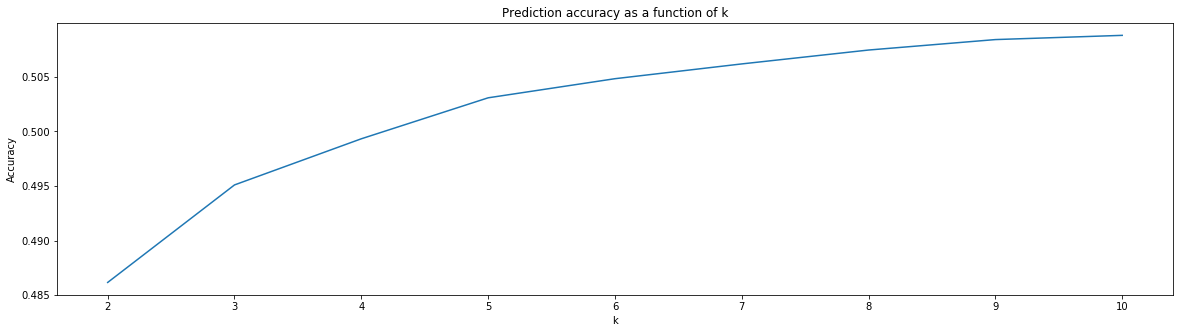

In [10]:
#Plot accuracy as a function of the number of K (2-10)
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
ks = range(2, 11)
plt.plot(ks, accuracy)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Prediction accuracy as a function of k")
plt.show()

In [12]:
#K=4 was chosen for simplicity compared to accuracy

#Test score
knn = neighbors.KNeighborsClassifier(n_neighbors=4, weights = "distance")

#Fit the data and make predictions
knn.fit(X_train, y_train).predict(X_test)

#Calculate accuracy
score = knn.fit(X_train, y_train).score(X_test, y_test)
print score

0.517340051206


In [21]:
tree_data = pd.read_csv('2015_tree_data_updated.csv')

unique, counts = np.unique(zip(tree_data['Spc_Common']), return_counts=True)
print sorted(zip(counts, unique), reverse = True)
#Try doing KNN for only the top 5 species
top5_spec = ['London planetree','honeylocust', 'Callery pear','pin oak', 'Norway maple']
tree_spec5 = []
tree_lat5 = []
tree_lon5 = []
for i in range(len(tree_data)):
    if tree_data['Spc_Common'][i] in top5_spec:
        tree_spec5.append(tree_data['Spc_Common'][i])
        tree_lat5.append(tree_data['Latitude'][i])
        tree_lon5.append(tree_data['Longitude'][i])
print len(tree_spec5)
#print tree_spec5[:10]
#print tree_lat5[:10]
#print tree_lon5[:10]

#KNN classifier
#Load relevant libraries
import numpy as np
import pylab as pl
from sklearn import neighbors, datasets, model_selection

#Split data set into a training and a test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(zip(tree_lat5, tree_lon5)
                                                    , tree_spec5
                                                    , test_size=0.15
                                                    , random_state=42)

accuracy = []
#Classify KNN with K=2-10
for k in range(2,11):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights = "distance")
    
    #Fit the data and make predictions
    knn.fit(X_train, y_train).predict(X_test)

    #Calculate accuracy
    #score = knn.fit(X_train, y_train).score(X_test, y_test)
    n_folds = 5
    score = np.mean(model_selection.cross_val_score(knn.fit(X_train, y_train),X_train, y_train,cv=n_folds))
    print "KNN score for k =", k, ":", score
    
    #Save accuracy into a list
    accuracy.append(score)

[(87014, 'London planetree'), (64264, 'honeylocust'), (58931, 'Callery pear'), (53185, 'pin oak'), (34189, 'Norway maple'), (29742, 'littleleaf linden'), (29279, 'cherry'), (29258, 'Japanese zelkova'), (21024, 'ginkgo'), (19338, 'Sophora'), (17246, 'red maple'), (16251, 'green ash'), (13530, 'American linden'), (12277, 'silver maple'), (10657, 'sweetgum'), (8400, 'northern red oak'), (7995, 'silver linden'), (7975, 'American elm'), (7080, 'maple'), (6879, 'purple-leaf plum')]
297583
KNN score for k = 2 : 0.704081936424
KNN score for k = 3 : 0.702540110987
KNN score for k = 4 : 0.704034511536
KNN score for k = 5 : 0.702745680523
KNN score for k = 6 : 0.701962891889
KNN score for k = 7 : 0.701346174765
KNN score for k = 8 : 0.700005955431
KNN score for k = 9 : 0.698875265002
KNN score for k = 10 : 0.69768924392


In [13]:
#Create Decision tree classifier

#Load relevant libraries
import numpy as np
from sklearn import tree
from sklearn import model_selection

#Split data set into a training and a test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(zip(tree_data['Latitude'], tree_data['Longitude'])
                                                    , tree_data['Spc_Common']
                                                    , test_size=0.15
                                                    , random_state=42)

#Classify Decision trees
dt = tree.DecisionTreeClassifier(random_state = 42)

#Fit the data and make predictions
dt.fit(X_train, y_train).predict(X_test)

#Calculate accuracy
#score = dtnn.fit(X_train, y_train).score(X_test, y_test)
n_folds = 5
score = np.mean(model_selection.cross_val_score(dt.fit(X_train, y_train),X_train, y_train,cv=n_folds))
print "Decision tree accuracy:", score

Decision tree accuracy: 0.490227832205


## Classify health based on location

In [22]:
#Adjust KNN classifyer

#Load relevant libraries
import numpy as np
import pylab as pl
from sklearn import neighbors, datasets, model_selection

#Split data set into a training and a test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(zip(tree_data['Latitude'], tree_data['Longitude'])
                                                    , tree_data['Health']
                                                    , test_size=0.15
                                                    , random_state=42)

accuracy = []
#Classify KNN with K=2-10
for k in range(2,11):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights="distance")

    #Fit the data and make predictions
    knn_pred = knn.fit(X_train, y_train).predict(X_test)

    #Calculate accuracy
    #score = knn.fit(X_train, y_train).score(X_test, y_test)
    n_folds = 5
    score = np.mean(model_selection.cross_val_score(knn.fit(X_train, y_train),X_train, y_train,cv=n_folds))
    print "KNN score for k =", k, ":", score
    
    #Save accuracy into a list
    accuracy.append(score)

C:\Users\Cecilie\.anaconda\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
C:\Users\Cecilie\.anaconda\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


KNN score for k = 2 : 0.768112149227
KNN score for k = 3 : 0.789842752784
KNN score for k = 4 : 0.798109764942
KNN score for k = 5 : 0.804213182933
KNN score for k = 6 : 0.80804514699
KNN score for k = 7 : 0.810998909425
KNN score for k = 8 : 0.813439834781
KNN score for k = 9 : 0.815178637038
KNN score for k = 10 : 0.816549869474


In [23]:
#Test accuracy

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights="distance")
#Fit the data and make predictions
knn_pred = knn.fit(X_train, y_train).predict(X_test)

#Calculate accuracy
score = knn.fit(X_train, y_train).score(X_test, y_test)
print score

0.806917109432


In [24]:
#Create Decision tree classifier

#Load relevant libraries
import numpy as np
from sklearn import tree
from sklearn import model_selection


#Split data set into a training and a test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(zip(tree_data['Latitude'], tree_data['Longitude'])
                                                    , tree_data['Health']
                                                    , test_size=0.15
                                                    , random_state=42)

#Classify Decision trees
dt = tree.DecisionTreeClassifier(random_state = 42)

#Fit the data and make predictions
dt_pred = dt.fit(X_train, y_train).predict(X_test)

#Calculate accuracy
#score = dtnn.fit(X_train, y_train).score(X_test, y_test)
n_folds = 5
score = np.mean(model_selection.cross_val_score(dt.fit(X_train, y_train),X_train, y_train,cv=n_folds))
print "Decision tree accuracy:", score

Decision tree accuracy: 0.748111525321


In [ ]:
# Create SVM classifier

#Load relevant libraries
import numpy as np
from sklearn import svm
from sklearn import model_selection

#Split data set into a training and a test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(zip(tree_data['Latitude'], tree_data['Longitude'])
                                                    , tree_data['Health']
                                                    , test_size=0.15
                                                    , random_state=42)

#Classify Decision trees
svm = svm.SVC(random_state = 42)

#Fit the data and make predictions
svm.fit(X_train, y_train).predict(X_test)

#Calculate accuracy
#score = dtnn.fit(X_train, y_train).score(X_test, y_test)
n_folds = 5
score = np.mean(model_selection.cross_val_score(svm.fit(X_train, y_train),X_train, y_train,cv=n_folds))
print "SVM accuracy:", score